<img src="https://user-images.githubusercontent.com/7065401/39117173-a433bf6a-46e6-11e8-8a40-b4d4d6422493.jpg"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Missing Data

![separator2](https://i.imgur.com/4gX5WFr.png)

## Hands on! 

In [29]:
import numpy as np
import pandas as pd

What does "missing data" mean? What is a missing value? It depends on the origin of the data and the context it was generated. For example, for a survey, a _`Salary`_ field with an empty value, or a number 0, or an invalid value (a string for example) can be considered "missing data". These concepts are related to the values that Python will consider "Falsy":

In [33]:
falsy_values = (0, False, None, '', [], {})
falsy_values

(0, False, None, '', [], {})

For Python, all the values above are considered "falsy":

In [34]:
any(falsy_values)

False

In [35]:
falsy_values = (0, False, None, '', [], {},np.nan)
any(falsy_values)

True

Numpy has a special "nullable" value for numbers which is `np.nan`. It's _NaN_: "Not a number"

In [36]:
np.nan

nan

The `np.nan` value is kind of a virus. Everything that it touches becomes `np.nan`:

In [37]:
3 + np.nan

nan

In [42]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [43]:
a.sum()

nan

In [44]:
a.mean()

nan

This is better than regular `None` values, which in the previous examples would have raised an exception:

In [45]:

l = [None]*10
l

[None, None, None, None, None, None, None, None, None, None]

For a numeric array, the `None` value is replaced by `np.nan`:

In [46]:
a = np.array([1, 2, 3, np.nan, None, 4], dtype='float')

In [47]:
a

array([ 1.,  2.,  3., nan, nan,  4.])

As we said, `np.nan` is like a virus. If you have any `nan` value in an array and you try to perform an operation on it, you'll get unexpected results:

In [48]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [49]:
a.mean()

nan

In [50]:
a.sum()

nan

Numpy also supports an "Infinite" type:

In [51]:
np.inf

inf

Which also behaves as a virus:

In [52]:
3 + np.inf

inf

In [53]:
np.inf / 3

inf

In [54]:
np.inf / np.inf

nan

In [55]:
b = np.array([1, 2, 3, np.inf, np.nan, 4], dtype=np.float)

In [56]:
b.sum()

nan

![separator1](https://i.imgur.com/ZUWYTii.png)

### Checking for `nan` or `inf`

There are two functions: `np.isnan` and `np.isinf` that will perform the desired checks:

In [57]:
np.isnan(np.nan)

True

In [58]:
np.isinf(np.inf)

True

And the joint operation can be performed with `np.isfinite`.

In [59]:
np.isinf(np.nan), np.isinf(np.inf)

(False, True)

In [60]:
np.isnan(np.nan), np.isnan(np.inf)

(True, False)

`np.isnan` and `np.isinf` also take arrays as inputs, and return boolean arrays as results:

In [61]:
np.isnan(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False,  True, False, False])

In [62]:
np.isinf(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False, False,  True, False])

In [63]:
np.isfinite(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([ True,  True,  True, False, False,  True])

_Note: It's not so common to find infinite values. From now on, we'll keep working with only `np.nan`_

![separator1](https://i.imgur.com/ZUWYTii.png)

### Filtering them out

Whenever you're trying to perform an operation with a Numpy array and you know there might be missing values, you'll need to filter them out before proceeding, to avoid `nan` propagation. We'll use a combination of the previous `np.isnan` + boolean arrays for this purpose:

In [37]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [64]:
np.isnan(a)

array([False, False, False,  True,  True, False])

In [65]:
a[~np.isnan(a)]

array([1., 2., 3., 4.])

Which is equivalent to:

In [67]:
a[np.isfinite(a)]

array([1., 2., 3., 4.])

And with that result, all the operation can be now performed:

In [68]:
a[np.isfinite(a)].sum()

10.0

In [69]:
a[np.isfinite(a)].mean()

2.5

![separator2](https://i.imgur.com/4gX5WFr.png)

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

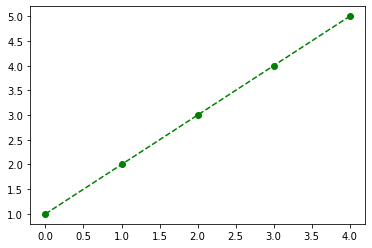

In [80]:
plt.plot([1,2,3,4,5],'go--')